In [ ]:
# source: https://gist.github.com/qubyte/3768908

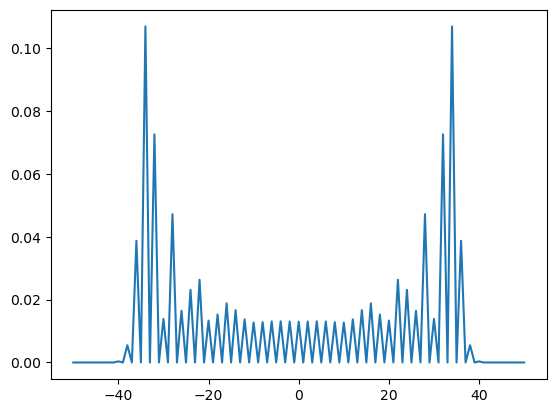

In [107]:
"""
Requires matplotlib for plotting. Tested with python 27. If you want to try this
without plotting, remove the final two lines and the pylab import. The guts only
depends on math and will work with vanilla python.
"""
import math
import pylab

import matplotlib.pyplot as plt


def probabilities(posn):
    """Returns a list of the probabilies for each place."""
    return [sum([abs(amp) ** 2 for amp in place]) for place in posn]


def normalise(posn):
    """Normalise function to normalise an input 1D line."""
    N = math.sqrt(sum(probabilities(posn)))
    return [[amp / N for amp in place] for place in posn]


def timestep(posn):
    """Defines action of a timestep, i.e. a Hadamard gate on each element."""
    return normalise([[x[0] + x[1], x[0] - x[1]] for x in posn])


def shift(coin):
    """Shift the up elements leftwards and the down elements rightwards."""
    newposn = [[0, 0] for i in range(len(coin))]
    for j in range(1, len(posn) - 1):
        newposn[j + 1][0] += coin[j][0]
        newposn[j - 1][1] += coin[j][1]
    return normalise(newposn)


# Initialise lists.
#min, max = -500, 501
#min, max = -100, 101
min, max = -50, 51
posn = [[0, 0] for i in range(min, max)]
posn[-min] = [1 / math.sqrt(2), 1j / math.sqrt(2)]

# Run for some steps...
for time in range(-min):
    posn = shift(timestep(posn))
    
# 
probs = probabilities(posn)

# Plot.
#pylab.plot(range(min, max), probabilities(posn))
pylab.plot(range(min, max), probs)
pylab.show()

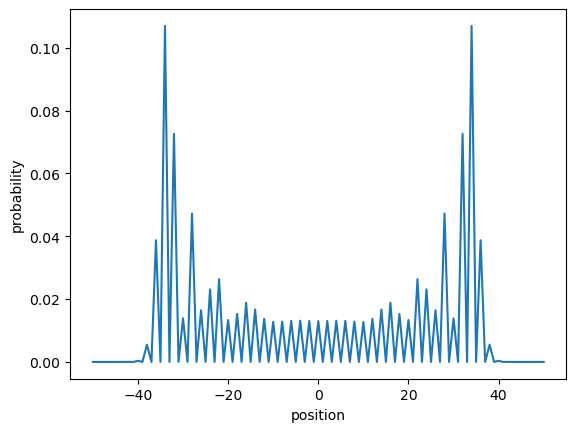

In [113]:
plt.plot(range(min,max), probs)
plt.xlabel('position')
plt.ylabel('probability')
plt.show()

In [114]:
def smooth(s, window=3):
    d = s
    w = window//2 # half width
    for i in range(len(s)):
        n = 0
        acc = 0.0
        
        for j in range(-w, w):
            if (i+j >= 0) and (i+j < len(s)):
                n += 1
                acc += s[i+j]
            
        d[i] = acc / n
    return d

In [115]:
# https://en.wikipedia.org/wiki/Gaussian_function
def gen_gaussian(min, max, n, std_dev=-1.0):
    
    d = list(range(n))
    avg = (max+min)/2
    dx = (max-min+1)/n
    x = float(min)
    
    if (std_dev < 0.0):
        std_dev = 0.25 * n
        
    std_dev_squared = std_dev * std_dev
    
    c = 1.0 / (std_dev * math.sqrt(2.0 * math.pi) )
    
    for i in range(n):
        t = (x - avg)*(x - avg)
        t = t / (std_dev_squared)
        t *= -0.5
        d[i] = c * math.exp(t)
        x += dx
        
    return d

In [117]:
# for the quantum walk, we only want to keep the even-numbered values since
# the odd numbered value probabilities are always zero
# see https://www.tandfonline.com/doi/abs/10.1080/00107151031000110776, Fig. 6

probs_even = [ probs[i]  for i in range(len(probs)) if (i % 2 == 0)]


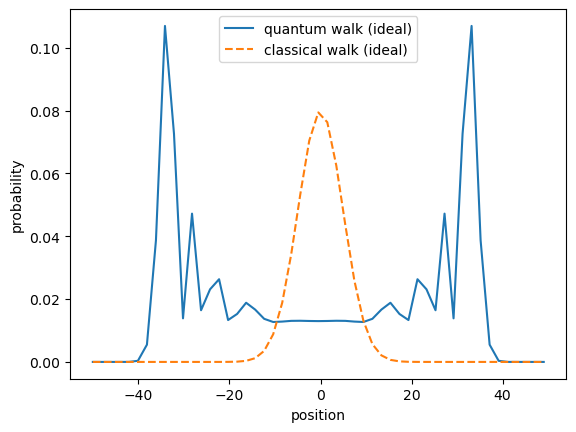

In [118]:
import numpy as np

x = np.arange(min, max, len(probs)/len(probs_even))
plt.plot(x, probs_even)

plt.plot(x, gen_gaussian(min,max,len(probs_even),std_dev=5.0), linestyle="dashed")

plt.xlabel('position')
plt.ylabel('probability')
plt.legend(["quantum walk (ideal)", "classical walk (ideal)"])
plt.savefig("quantum_vs_classical_walk_fig.pdf")
plt.show()